# Task 3 - Recommend: Similar MOFs to HKUST-1 for Carbon Capture
In this notebook, we demonstrate the ability of knowledge graph-augmented LLMs to recommend similar MOFs for specific applications. If a researcher knows MOF with many desirable properties but is lacking in one specific area, they may want suggestions to the next-closest MOF that satisfies their need. 

By first retreiving application-specific data from our graph, we generate a subset of MOFs that have been recommended for Carbon Capture. We can then search for which of these MOFs is the closest to UiO-66 based on distance in an embedding space.

## Getting Data From Knowledge Graph

In [1]:
from src.MOF_ChemUnity.Agents.QueryAgent import QueryGenerationAgent
import pandas as pd

In [2]:
# Connect to graph
agent = QueryGenerationAgent()
data = agent.run_full_query("Descriptors for all MOFs.")

✅ Connected to Neo4j.


,m.refcode,descriptor_name,descriptor_value
0,DUHDOA,Density,1.90203
1,KUNSUJ,Density,0.635531
2,OGIJIX,Density,2.2293
3,WOCKOP,Density,1.67685
4,CURYAQ,Density,1.90272
...,...,...,...
2662909,AMIWOJ,Largest_included_sphere_along_free_path,4.77757
2662910,AMIWUP,Largest_included_sphere_along_free_path,4.82312
2662911,AMIXAW,Largest_included_sphere_along_free_path,4.76214
2662912,AMIXEA,Largest_included_sphere_along_free_path,4.79308


In [3]:
# Pivot
desc_df = data.pivot(index="m.refcode", columns="descriptor_name", values="descriptor_value")

# Remove the 'descriptor_name' name from the columns (make it a flat index)
desc_df.columns.name = None

# Reset index so 'CSD Ref Code' becomes a normal column
desc_df = desc_df.reset_index()

# Drop rows with any missing values
desc_df.dropna(inplace=True)

In [4]:
desc_df

,m.refcode,ASA_A^2,ASA_m^2/cm^3,ASA_m^2/g,D_func-I-0-all,D_func-I-1-all,D_func-I-2-all,D_func-I-3-all,D_func-S-0-all,D_func-S-1-all,...,mc-T-2-all,mc-T-3-all,mc-Z-0-all,mc-Z-1-all,mc-Z-2-all,mc-Z-3-all,mc-chi-0-all,mc-chi-1-all,mc-chi-2-all,mc-chi-3-all
0,ABACUF01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.008,...,336.0,176.0,2371.0,3370.666667,5608.0,2493.333333,1.7314,31.736,23.126733,48.36
1,ABAVIJ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,144.0,216.0,729.0,1242.0,1296.0,2268.0,3.5344,37.2992,38.352,80.7648
2,ABAVOP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,144.0,216.0,729.0,1242.0,1296.0,2268.0,3.5344,37.2992,38.352,80.7648
3,ABAXUZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.184,...,90.0,140.0,900.0,1170.0,1080.0,2100.0,2.7225,27.72,25.245,55.209
4,ABAYEI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.04,...,14.666667,21.333333,2209.0,720.666667,658.0,2475.333333,3.7249,12.763733,16.1348,20.0334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14359,ZUVTEP,193.841,1419.74,865.948,0.0,0.0,0.0,0.0,0.0,0.0,...,243.0,216.0,3249.0,3420.0,3078.0,4104.0,1.21,28.38,25.245,45.639
14360,ZUWXUM,1144.86,2695.85,2939.04,0.0,0.0,0.0,0.0,0.0,0.0,...,96.0,96.0,2401.0,3136.0,1176.0,1176.0,3.1684,48.9856,18.156,18.156
14361,ZUXPOZ,248.011,1858.49,928.493,0.0,0.0,0.0,0.0,0.0,0.0,...,48.0,80.0,8464.0,2944.0,2208.0,5152.0,1.9044,18.9888,14.076,33.0648
14362,ZUYLOW,643.712,1287.74,610.589,0.0,0.0,0.0,0.0,0.0,-0.06,...,72.0,80.0,841.0,4814.0,2871.0,2581.0,3.61,20.938,20.52,41.363


In [5]:
# Connect to graph
agent = QueryGenerationAgent()
co2_data = agent.run_full_query("CO2 storage MOFs and thier application justification.")

✅ Connected to Neo4j.


,m.refcode,application,r.justification
0,VIXVUV,CO2 Capture,The choice of the flexible adipate ligand for ...
1,XOTSEG,CO2 Capture,Although complex2displays a higher adsorption ...
2,XOTSIK,CO2 Capture,"However, the uptake value of carbon dioxide is..."
3,BAWROI,CO2 Capture,"The document mentions ""Porous Double-Walled Me..."
4,OTAXOX,CO2 Capture,γ-Mg-formate outperforms the α and β polymorph...
...,...,...,...
390,RIDJIZ,CO2 Capture,"In particular, the interest in open framework ..."
391,WOQTUT,CO2 Capture,Carbon dioxide capture processes are of public...
392,AVIHOE,CO2 Capture,The adsorption behaviour of 2 has been also in...
393,AVIHIY,CO2 Capture,Compounds adsorb high amounts of carbon dioxid...


In [6]:
# Connect to graph
agent = QueryGenerationAgent()
HKUST1_refcodes = agent.run_full_query("MOF named HKUST-1")

✅ Connected to Neo4j.


,m.refcode
0,TISPAO
1,WULJUJ
2,WULKAQ
3,YOZNAE
4,UVIPIZ
5,ZACHIX
6,LUDLED
7,BODPAN
8,OQIZUL


## Generate Embedding Space

We'll plot all the HKUST-1 MOFs in a different colour to confirm there are no outliars. This is a good sanity check to confirm all the HKUST-1 MOFs are very close in the embedding space - as they should be if they are truly duplicates.

/home/tom-pruyn/miniconda3/envs/llms/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


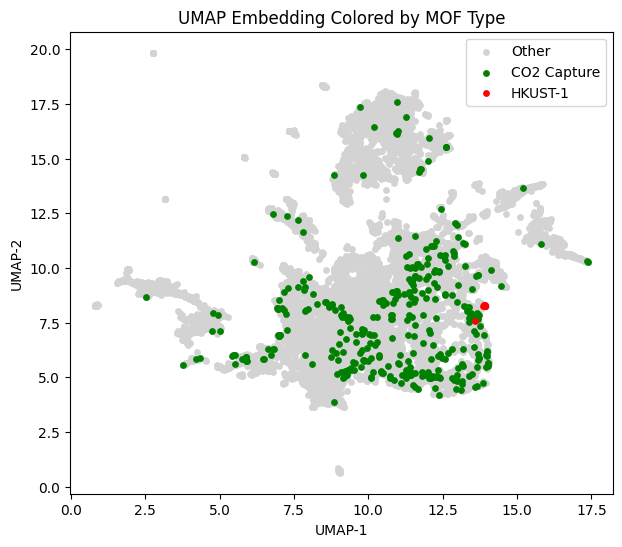

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

# --- Step 1: Preprocess descriptors ---
df = desc_df.copy()
refcodes = df['m.refcode']
X = df.drop(columns=['m.refcode'])

X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median())

# --- Step 2: Standardize and embed with UMAP ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

umap_model = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42)
embedding = umap_model.fit_transform(X_scaled)

df['UMAP-1'] = embedding[:, 0]
df['UMAP-2'] = embedding[:, 1]
df['label'] = "Other"

# --- Step 3: Tag HKUST-1 and CO₂ capture MOFs ---
co2_refcodes = set(co2_data["m.refcode"])
hkust_refcodes = set(HKUST1_refcodes["m.refcode"])

df.loc[df['m.refcode'].isin(co2_refcodes), "label"] = "CO2 Capture"
df.loc[df['m.refcode'].isin(hkust_refcodes), "label"] = "HKUST-1"

# --- Step 4: Plot ---
color_map = {
    "Other": "lightgray",
    "CO2 Capture": "green",
    "HKUST-1": "red"
}

plt.figure(figsize=(7, 6))
for label, color in color_map.items():
    subset = df[df["label"] == label]
    plt.scatter(subset["UMAP-1"], subset["UMAP-2"], label=label, c=color, s=15)

plt.legend()
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.title("UMAP Embedding Colored by MOF Type")
plt.show()


In [8]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# --- Step 1: Extract HKUST-1 embeddings ---
hkust_df = df[df['label'] == 'HKUST-1'].copy()
hkust_embeddings = hkust_df[['UMAP-1', 'UMAP-2']].values

# --- Step 2: Compute centroid ---
centroid = np.mean(hkust_embeddings, axis=0)

# --- Step 3: Compute distances to centroid ---
distances = euclidean_distances(hkust_embeddings, [centroid]).flatten()
hkust_df['distance_to_centroid'] = distances

# --- Step 4: Display sorted distances ---
print("📏 Distance of each HKUST-1 MOF to centroid in UMAP space:")
print(hkust_df[['m.refcode', 'UMAP-1', 'UMAP-2', 'distance_to_centroid']].sort_values(by='distance_to_centroid', ascending=False))


📏 Distance of each HKUST-1 MOF to centroid in UMAP space:
      m.refcode     UMAP-1    UMAP-2  distance_to_centroid
1002     BODPAN  13.573599  7.557537              0.700946
11573    TISPAO  13.902417  8.303700              0.115383
14169    ZACHIX  13.909163  8.283916              0.099206
14086    YOZNAE  13.912351  8.282001              0.098831
13125    WULKAQ  13.920177  8.275947              0.097353
7083     LUDLED  13.875439  8.290141              0.096994
12117    UVIPIZ  13.934608  8.255155              0.090411
13124    WULJUJ  13.928913  8.249170              0.082166
8874     OQIZUL  13.860574  8.242940              0.050193


It's clear that BODPAN is the outliar, so we can filter it out before we continue our search

In [9]:
# Filter HKUST-1 MOFs, excluding BODPAN
hkust_df = df[(df['label'] == 'HKUST-1') & (df['m.refcode'] != 'BODPAN')]
hkust_embeddings = hkust_df[['UMAP-1', 'UMAP-2']].values

In [10]:
# Step 1: Join UMAP info to CO2 MOFs without overwriting original co2_data
co2_umap = df[df['m.refcode'].isin(co2_refcodes)].copy()

# Step 2: Compute HKUST-1 centroid
hkust_df = df[(df['label'] == 'HKUST-1') & (df['m.refcode'] != 'BODPAN')]
hkust_embeddings = hkust_df[['UMAP-1', 'UMAP-2']].values
hkust_centroid = hkust_embeddings.mean(axis=0)

# Step 3: Compute distances from CO2 capture MOFs to HKUST-1 centroid
from sklearn.metrics.pairwise import euclidean_distances
co2_umap['distance_to_hkust'] = euclidean_distances(
    co2_umap[['UMAP-1', 'UMAP-2']], hkust_centroid.reshape(1, -1)
)

# Step 4: Select 5 closest
closest_mofs = co2_umap.sort_values(by='distance_to_hkust').head(5)


Use KG to Find MOF Names

In [11]:
# Connect to graph
agent = QueryGenerationAgent()
names = agent.run_full_query("ALl MOF names for these refcodes, return one row per MOF and delineate each name: LUYHAP, LIKDOA, XALDAS, EQUNIP, LACBID")

✅ Connected to Neo4j.


,m.refcode,mof_names
0,EQUNIP,"[compound 4, [(CH3)2NH2]Â­[In3OÂ­(EBDC)1.5Â­(H..."
1,LACBID,"[compound 1, [Co7(bdc)6(nIm)2(H2O)6]Â·3H2OÂ·3DMF]"
2,LIKDOA,"[ZJU-36, ZJU-36a]"
3,LUYHAP,"[PCN-46, NbO-type MOF]"
4,XALDAS,"[MSO2Pr-100, WUF-10]"


In [12]:
co2_data

,m.refcode,application,r.justification
0,VIXVUV,CO2 Capture,The choice of the flexible adipate ligand for ...
1,XOTSEG,CO2 Capture,Although complex2displays a higher adsorption ...
2,XOTSIK,CO2 Capture,"However, the uptake value of carbon dioxide is..."
3,BAWROI,CO2 Capture,"The document mentions ""Porous Double-Walled Me..."
4,OTAXOX,CO2 Capture,γ-Mg-formate outperforms the α and β polymorph...
...,...,...,...
390,RIDJIZ,CO2 Capture,"In particular, the interest in open framework ..."
391,WOQTUT,CO2 Capture,Carbon dioxide capture processes are of public...
392,AVIHOE,CO2 Capture,The adsorption behaviour of 2 has been also in...
393,AVIHIY,CO2 Capture,Compounds adsorb high amounts of carbon dioxid...


In [13]:
# Merge distance info from closest_mofs
context_df = names.merge(closest_mofs[['m.refcode', 'distance_to_hkust']], on='m.refcode', how='left')

# Merge application details from co2_data
context_df = context_df.merge(co2_data[['m.refcode', 'application', 'r.justification']], on='m.refcode', how='left')


## Vanilla vs Graph-Enhanced Chat-GPT Comparison

In [14]:
context_df 

,m.refcode,mof_names,distance_to_hkust,application,r.justification
0,EQUNIP,"[compound 4, [(CH3)2NH2]Â­[In3OÂ­(EBDC)1.5Â­(H...",0.553888,CO2 Capture,Both compounds 3 and 4 exhibit significant upt...
1,LACBID,"[compound 1, [Co7(bdc)6(nIm)2(H2O)6]Â·3H2OÂ·3DMF]",0.629662,CO2 Capture,"Additionally, compound 1 exhibits a high CO2 u..."
2,LIKDOA,"[ZJU-36, ZJU-36a]",0.460230,CO2 Capture,High-pressure gas-sorption isotherms indicate ...
3,LUYHAP,"[PCN-46, NbO-type MOF]",0.430671,CO2 Capture,The capture and sequestration of CO2 is consid...
4,XALDAS,"[MSO2Pr-100, WUF-10]",0.525079,CO2 Capture,MSO2Pr-100 gave the highest CO2/N2 selectivity...


First, here is the question both LLM's will be seeing

In [15]:
question = "What is another MOF like HKUST-1 that would be good for CO2 capture?"

### Graph-enhanced GPT-4o

In [16]:
# Auto-format RAG prompt from a DataFrame
def generate_few_shot_prompt(data, question, max_examples=12):
    subset = data.head(max_examples)

    # Define column name patterns to skip
    skip_patterns = ['m.refcode', 'id']
    lines = ["Here are some MOFs and some relevant information:"]

    for _, row in subset.iterrows():
        props = []

        for col in data.columns:
            col_lower = col.lower()
            if any(skip in col_lower for skip in skip_patterns):
                continue

            value = row[col]

            # Handle list-like or bracketed strings
            if isinstance(value, list):
                value_str = ", ".join(map(str, value))
            else:
                value_str = str(value).strip()
                if value_str.startswith("[") and value_str.endswith("]"):
                    value_str = value_str[1:-1]

            props.append(f"{col} = {value_str}")

        lines.append("- " + ", ".join(props))

    context = "\n".join(lines)
    rag_prompt = f"{context}\n\nUse the examples above to help answer the following question:\n{question.strip()}"
    return rag_prompt


# Now use the function to generate the prompt
rag_prompt = generate_few_shot_prompt(context_df, question)
print(rag_prompt)

Here are some MOFs and some relevant information:
- mof_names = compound 4, [(CH3)2NH2]Â­[In3OÂ­(EBDC)1.5Â­(H2O)3]2Â­[InÂ­(EBDC)]3Â·â€‹8DMFÂ·â€‹13Â­(CH3CN)Â·â€‹10Â­(H2O), distance_to_hkust = 0.5538879036903381, application = CO2 Capture, r.justification = Both compounds 3 and 4 exhibit significant uptake capacity for CO2 and H2, and compound 4 displays improved sorption energetics due to its narrow pore size and charge effect compared to 3.
- mof_names = compound 1, [Co7(bdc)6(nIm)2(H2O)6]Â·3H2OÂ·3DMF, distance_to_hkust = 0.6296617388725281, application = CO2 Capture, r.justification = Additionally, compound 1 exhibits a high CO2 uptake capacity of 14.5 wt% at 273 K and 1 atm mainly due to the existence of exposed nitro groups and uniquely nanometre-sized cages, which is comparable to 13.6 wt% for a previously reported ZIF-69 under the same conditions.
- mof_names = ZJU-36, ZJU-36a, distance_to_hkust = 0.46022966504096985, application = CO2 Capture, r.justification = High-pressure gas-

In [17]:
from openai import OpenAI
# Initialize client (uses OPENAI_API_KEY from .env automatically)
client = OpenAI()

# Send the prompt to GPT-4
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a materials science expert."},
        {"role": "user", "content": rag_prompt}
    ],
    temperature=0.5  # slightly higher to allow some reasoning flexibility
)

# Extract and print the response
rag_answer = response.choices[0].message.content.strip()
print(rag_answer)

Based on the examples provided, PCN-46, with a distance_to_hkust of 0.43067091703414917, is the most similar MOF to HKUST-1 among the listed options. It is noted for its effective CO2 capture capabilities, with a saturation excess CO2 uptake of 21.0 mmol g⁻¹ at 30 bar. This makes PCN-46 a strong candidate for CO2 capture applications, similar to HKUST-1.


### Vanilla GPT-4o

In [18]:
# Send the prompt to GPT-4
response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
        {"role": "system", "content": "You are a materials science expert."},
        {"role": "user", "content": question}
    ],
    temperature=0.5  # slightly higher to allow some reasoning flexibility
)

# Extract and print the response
vanilla_answer = response.choices[0].message.content.strip()
print(vanilla_answer)

HKUST-1, also known as Cu-BTC, is a well-known metal-organic framework (MOF) that has been extensively studied for CO2 capture due to its high surface area and porosity. If you are looking for another MOF with similar capabilities for CO2 capture, there are several options to consider:

1. **MOF-74 (CPO-27):** This MOF comes in different metal variants such as Mg-MOF-74 and Ni-MOF-74. MOF-74 is known for its high CO2 adsorption capacity due to its open metal sites, which provide strong interactions with CO2 molecules.

2. **UiO-66:** This zirconium-based MOF is notable for its high thermal and chemical stability. By functionalizing the organic linkers with amino groups, the CO2 adsorption capacity can be significantly enhanced due to the increased affinity for CO2.

3. **ZIF-8:** A member of the zeolitic imidazolate framework family, ZIF-8 is composed of zinc ions and 2-methylimidazole linkers. It exhibits excellent chemical stability and has shown good performance in CO2 capture, espe

In [19]:
# Connect to graph
agent = QueryGenerationAgent()
recommendations = agent.run_full_query("All mofs named MOF-74 or Mg-MOF-74, and PCN-46, and their CO2 Uptake Values")

✅ Connected to Neo4j.


,m.refcode,mof_name,co2_uptake_value
0,FIJDOS,MOF-74,None
1,COKPEZ,Mg-MOF-74,1.1
2,LUYHAP,PCN-46,21.0


In [20]:
recommendations.dropna(inplace=True)
recommendations

,m.refcode,mof_name,co2_uptake_value
1,COKPEZ,Mg-MOF-74,1.1
2,LUYHAP,PCN-46,21.0


/home/tom-pruyn/miniconda3/envs/llms/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


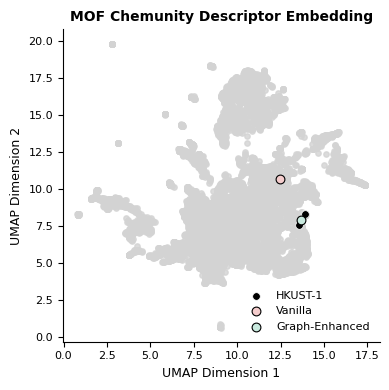

<Figure size 640x480 with 0 Axes>

In [31]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import umap
import matplotlib.pyplot as plt

# --- Step 1: Preprocess descriptors ---
df = desc_df.copy()
X = df.drop(columns=['m.refcode'])
X = X.apply(pd.to_numeric, errors='coerce').fillna(X.median())

# --- Step 2: UMAP embedding ---
X_scaled = StandardScaler().fit_transform(X)
embedding = umap.UMAP(n_neighbors=30, min_dist=0.1, random_state=42).fit_transform(X_scaled)
df['UMAP-1'], df['UMAP-2'] = embedding[:, 0], embedding[:, 1]
df['label'] = "Other"

# --- Step 3: Tag HKUST-1 and recommendations ---
hkust_refcodes = set(HKUST1_refcodes["m.refcode"])
df.loc[df['m.refcode'].isin(hkust_refcodes), "label"] = "HKUST-1"

recommendation_labels = dict(zip(recommendations["m.refcode"], recommendations["mof_name"]))
df.loc[df['m.refcode'].isin(recommendation_labels.keys()), "label"] = df['m.refcode'].map(recommendation_labels)

# Optional: Rename to match schematic labels
df['label'] = df['label'].replace({
    "Mg-MOF-74": "Vanilla",
    "PCN-46": "Graph-Enhanced"
})

# --- Step 4: Plot for Nature Panel ---
fig, ax = plt.subplots(figsize=(4, 4))

# Plot unlabeled MOFs (no legend entry)
ax.scatter(df[df["label"] == "Other"]["UMAP-1"], df[df["label"] == "Other"]["UMAP-2"],
           c="lightgray", s=15, alpha=0.8)

# Plot HKUST-1
ax.scatter(df[df["label"] == "HKUST-1"]["UMAP-1"], df[df["label"] == "HKUST-1"]["UMAP-2"],
           c="black", s=30, label="HKUST-1", edgecolor='white', linewidth=0.5, zorder=2)

# Plot Vanilla
ax.scatter(df[df["label"] == "Vanilla"]["UMAP-1"], df[df["label"] == "Vanilla"]["UMAP-2"],
           c="#f4cccc", s=40, label="Vanilla", edgecolor="black", linewidth=0.8, zorder=3)

# Plot Graph-Enhanced (normal marker)
ax.scatter(df[df["label"] == "Graph-Enhanced"]["UMAP-1"], df[df["label"] == "Graph-Enhanced"]["UMAP-2"],
           c="#c9eadf", s=40, label="Graph-Enhanced", edgecolor="black", linewidth=0.8, zorder=3)

# Clean, compact legend
handles, labels = ax.get_legend_handles_labels()
labels_order = ["HKUST-1", "Vanilla", "Graph-Enhanced"]
ordered_handles = [handles[labels.index(lbl)] for lbl in labels_order]
ax.legend(ordered_handles, labels_order, frameon=False, fontsize=8, loc='lower right')

# Labels and styling
ax.set_xlabel("UMAP Dimension 1", fontsize=9)
ax.set_ylabel("UMAP Dimension 2", fontsize=9)
ax.set_title("MOF Chemunity Descriptor Embedding", fontsize=10, weight='bold')
ax.tick_params(axis='both', labelsize=8)
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("umap_nature_final_clean.png", dpi=300, transparent=True)
plt.savefig("umap_nature_final_clean.pdf", transparent=True)
plt.show()

plt.savefig("umap.png", dpi=300, transparent=True)

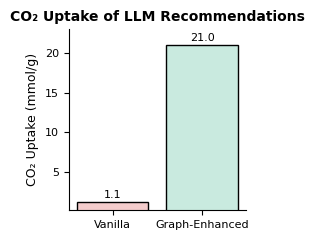

In [38]:
import matplotlib.pyplot as plt

# Prepare and convert data to float
data = {
    "Vanilla": float(recommendations.loc[recommendations["mof_name"] == "Mg-MOF-74", "co2_uptake_value"].values[0]),
    "Graph-Enhanced": float(recommendations.loc[recommendations["mof_name"] == "PCN-46", "co2_uptake_value"].values[0])
}
values = list(data.values())

# Plot
fig, ax = plt.subplots(figsize=(2.5, 2.5))
bars = ax.bar(data.keys(), values, color=["#f4cccc", "#c9eadf"], edgecolor="black")

# Y-axis scaling
ymin = min(values) - 1 if min(values) > 1 else 0
ymax = max(values) + 2
ax.set_ylim(ymin, ymax)

# Style
ax.set_ylabel("CO₂ Uptake (mmol/g)", fontsize=9)
ax.set_title("CO₂ Uptake of LLM Recommendations", fontsize=10, weight="bold")
ax.tick_params(axis='both', labelsize=8)

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax.annotate(f"{height:.1f}", xy=(bar.get_x() + bar.get_width() / 2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', fontsize=8)

# Clean styling
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

plt.tight_layout()
plt.savefig("co2.png", dpi=300, transparent=True, bbox_inches="tight", pad_inches=0.1)
plt.savefig("co2_uptake_panel_final_fixed.png", dpi=300, transparent=True, bbox_inches="tight", pad_inches=0.1)
plt.savefig("co2_uptake_panel_final_fixed.pdf", transparent=True, bbox_inches="tight", pad_inches=0.1)

